# LOG6308 : Tp1 - Recommendation by collaboratif filtering 

- Clément Bernard (2096223)
- Ghaith Dekhili ()

## Importations 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
from scipy.spatial import distance

## Data 

In [3]:
# The path where is the fold data
PATH_DATA = 'data'

In [4]:
# The items 
items = pd.read_csv(os.path.join(PATH_DATA, 'items.csv'), sep='|')
# User data 
u = pd.read_csv(os.path.join(PATH_DATA, 'u.csv'), sep='|')
# Votes of the user 
votes = pd.read_csv(os.path.join(PATH_DATA, 'votes.csv'), sep='|')

In [5]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
u

,id,age,gender,job,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [7]:
votes

,user.id,item.id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


## Creation of sparse matrix : User-item matrix

In [8]:
# The number of users 
N_USERS = u.shape[0]
# The number of items 
N_ITEMS = items.shape[0]

In [10]:
def create_sparse_matrix(votes) : 
    ''' Create a User-Items sparse matrix '''
    # Create NaN for each items and users 
    data = {i : [np.nan for j in range(N_USERS + 1)] for i in range(N_ITEMS+1)}
    def to_convert(x, data) :
        data[x['item.id']][x['user.id']] = x['rating']
        return None 
    votes.apply(to_convert , axis = 1 , args = [data])
    return pd.DataFrame(data)

In [11]:
user_item = create_sparse_matrix(votes)

In [12]:
user_item

,0,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1 

- Tout d'abord, nous creons les indexes qui vont permettre de diviser nos données pour la cross-validation

In [11]:
def kfold(n_data, k = 10 , SEED = 77, shuffle = False ) : 
    ''' Split the data into K-Folds 
        Input : The length of the data to split 
        Output : The indexes of the different folds 
    '''
    # Fix the SEED to have consistent results 
    np.random.seed(SEED)
    # Create the indexes 
    indexes = np.arange(n_data)
    # Shuffle the matrix 
    if shuffle : 
        np.random.shuffle(indexes)
    # The size of the subindexes
    sub_size = n_data // k 
    # Size of the last fold used for the test 
    last_size = sub_size + n_data%k
    # Where we store all the indexes 
    all_indexes = {'train' : [], 'test' : []}
    # Index of the test 
    test_i = 0 
    for i in range(k) :
        train = []
        # Check if we are the last set 
        if test_i == k-1 : 
            all_indexes['test'].append(indexes[-last_size:])
            all_indexes['train'].append(indexes[:-last_size ])
        else : 
            all_indexes['test'].append(indexes[ test_i * sub_size : (test_i+1) * sub_size ])
            # Get the indexes outside the test indexes
            train = [] 
            train.extend(indexes[:test_i * sub_size])
            train.extend(indexes[(test_i+1) * sub_size : ])
            all_indexes['train'].append(train)
        
        
        test_i +=1 
        
    return all_indexes


- Maintenant, nous implémentons les fonctions pour calculer les valeurs moyennes des utilisateurs et items 

In [12]:
def average_user(user_item) : 
    ''' Compute the average score for the users '''
    # Compute the mean for the users 
    return user_item.apply( lambda x : np.mean(x) , axis = 1 ).iloc[1:]
    
def average_item(user_item) : 
    ''' Compute the average score for the items '''
    # Compute the mean for the items 
    return user_item.apply( lambda x : np.mean(x) , axis = 0 ).iloc[1:]

In [13]:
# The mean by users 
user_item_mean_u = average_user(user_item)
# The mean by items
user_item_mean_i = average_item(user_item)

- Valeur moyenne par utilisateur 

In [14]:
user_item_mean_u

1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Length: 943, dtype: float64

- Valeur moyenne par item

In [15]:
user_item_mean_i

1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Length: 1682, dtype: float64

- Utilisation de la cross-validation pour calculer l'erreur 

In [17]:
user_item = user_item.iloc[1:,1:]

In [18]:
user_item

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
votes

,user.id,item.id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [19]:
def cross_validation(N ,k , votes = votes , user_item = user_item) : 
    ''' Compute the quadratic error with K-cross-validation
        Inputs : 
            - N : The size of the data to split (either size of items or users)
    '''
    # Dictionnary that will store the errors 
    errors = {}
    # Loop over the K-Folds 
    for i, (i_train, i_test) in enumerate(zip(*kfold(N,k, shuffle = True ).values())) : 
        # Copy the original user-item matrix 
        u_item = user_item.copy()
        # Get the indexes of the test 
        indexes_test = votes.iloc[i_test,:2]
        
        def to_convert(x, user_item) :
            # Make the test rating to NaN
            user_item[x['item.id']][x['user.id']] = np.nan
        # Convert the test rating to NaN
        indexes_test.apply(to_convert , axis = 1 , args = [u_item])
        # Get the mean within the training indexes
        mean_item = average_item(u_item)
        mean_user = average_user(u_item)
        # Set the error to 0
        errors[i] = 0 
        
        def compute_dist(x, mean_item, mean_user, user_item, errors, i) :
            '''Compute the RMSE''' 
            # Get the item id 
            item = x['item.id']
            # Get the user id 
            user = x['user.id']
            # Make the prediction : the mean between user and item score 
            prediction = (mean_item[item] + mean_user[user])/2
            # Get the true label 
            true_value = user_item.iloc[user,item]
            # Compute the error 
            error = np.sqrt( ( prediction - true_value)**2)
            # If NaN : pass
            if np.isnan(error) : 
                return None
            # Increment the error 
            errors[i]+=error
            return None 
        # Apply the computation of RMSE 
        indexes_test.apply(compute_dist, axis = 1 , args = [mean_item, mean_user, user_item, errors,i])
        # Normalise by the size of the testing set 
        errors[i]/=indexes_test.shape[0]
            
    return errors
    

In [20]:
error_user = cross_validation( N = votes.shape[0] ,k = 10  )

IndexError: single positional indexer is out-of-bounds

In [ ]:
error_user

In [ ]:
plt.bar(list(error_user.keys()) , list(error_user.values()))

- Print the results 

In [ ]:
print('Mean square error for all the K-folds : {}'.format(error_user))
print('Mean square error for all the folds : {}'.format(np.mean(list(error_user.values()))))

## Question 2 

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import time

In [14]:
item_item = user_item.T.copy().iloc[1:,1:]

In [15]:
item_item

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.a Distribution (histogramme) des similarités (poids w )

In [20]:
def get_similarity_matrix(item_item) : 
    ''' Return a dataframe of size : N_ITEM x N_ITEM with the similarity for each user 
            within the other items '''
    
    #df_sim = pd.DataFrame(np.zeros((N_ITEMS+1, N_ITEMS+1))) 
    df_sim = pd.DataFrame(np.zeros((N_ITEMS, N_ITEMS)))
    for a in range(N_ITEMS) :
        df_sim.iloc[a] = cosine_similarity(item_item.iloc[a].fillna(0).values.reshape(1, -1), item_item.fillna(0))
    return df_sim

In [21]:
initial_time = time.time()
def_sim = get_similarity_matrix(item_item)
print(time.time()-initial_time)

36.14444088935852


In [22]:
def_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,1.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,1.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,1.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,1.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


In [23]:
def_sim.shape

(1682, 1682)

Text(0, 0.5, 'Number of values')

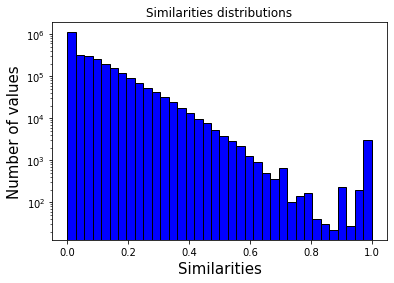

In [24]:
import matplotlib.pyplot as plt

testList__ = def_sim.values.flatten()
plt.hist(testList__, color = 'blue', edgecolor = 'black', bins = int(180/5), log=True)
         
# Add labels
plt.title('Similarities distributions')
plt.xlabel('Similarities',fontsize=15)
plt.ylabel('Number of values',fontsize=15)

### La proportion de poids nuls

In [25]:
def print_zeros_weighs_proportion(df):
    """
    prints proportion of zeros among all similarities values
    """
    listOfSimilarities = df.values.flatten()
    
    numZeros = 0
    for z in listOfSimilarities:
        if z == 0:
            numZeros +=1
    print("proportion of zero weights = ", numZeros/len(listOfSimilarities))
    

In [26]:
print_zeros_weighs_proportion(def_sim)

proportion of zero weights =  0.3043450905651361


### 2.b 

In [27]:
def buil_neighbors_indexes(item_item):
    """
    Returns a df with items and their neighbors with similarities and a df with neighbors' indexes 
    """
    #A df for items and their neighbors with similarities
    df_10_neighbors = pd.DataFrame(np.zeros((N_ITEMS, 10)), index = range(1,N_ITEMS+1))  
    #A df for items with their neighbors' indexes 
    df_10_index = pd.DataFrame(np.zeros((N_ITEMS, 10)), index = range(1,N_ITEMS+1))
                                
    #count = 0
    for i in range(len(item_item)):
        mySeries = def_sim.iloc[i].copy()    
        for n in range(10):
            max_val = mySeries.values.max()
            max_idx = pd.Index(mySeries).get_loc(max_val)
            
            #we don't take the actual item as neighbor of itself
            if type(max_idx) is int and max_idx == i:
                mySeries = mySeries.drop(mySeries.index[max_idx])
                max_val = mySeries.values.max()
                max_idx = pd.Index(mySeries).get_loc(max_val)
            
            #There are some max with a list of boolean as index, so we don't take them
            while type(max_idx) is not int:
                #count +=1
                mySeries = mySeries.drop(mySeries.index[max_idx])
                max_val = mySeries.values.max()
                max_idx = pd.Index(mySeries).get_loc(max_val)            
            
            df_10_neighbors.iloc[i,n] =  max_val
            #in the next line we add 1 as our items index start with 1  
            df_10_index.iloc[i,n] = int(max_idx+1)
            mySeries = mySeries.drop(mySeries.index[max_idx])
            #print("count:",count)
    return df_10_neighbors, df_10_index

In [28]:
df_10_neighbors_sim,df_10_index = buil_neighbors_indexes(item_item)

In [29]:
df_10_neighbors_sim.head()

,0,1,2,3,4,5,6,7,8,9
1,0.734572,0.699925,0.689786,0.664555,0.641322,0.638158,0.636727,0.630601,0.624075,0.622382
2,0.659619,0.623544,0.617274,0.616143,0.604969,0.601960,0.597083,0.595684,0.590124,0.584100
3,0.452023,0.444355,0.423249,0.404930,0.404787,0.404239,0.404080,0.401676,0.397274,0.396868
4,0.650507,0.628946,0.628720,0.620055,0.617312,0.604652,0.602747,0.601488,0.601319,0.599989
5,0.547787,0.472725,0.472399,0.450780,0.445242,0.440996,0.435349,0.430292,0.425298,0.424652


In [30]:
df_10_neighbors_sim.shape

(1682, 10)

In [31]:
df_10_index.head()

,0,1,2,3,4,5,6,7,8,9
1,49.0,179.0,119.0,115.0,400.0,147.0,216.0,98.0,229.0,168.0
2,232.0,160.0,382.0,399.0,61.0,570.0,223.0,227.0,542.0,94.0
3,409.0,761.0,41.0,32.0,247.0,16.0,1040.0,818.0,469.0,231.0
4,55.0,202.0,172.0,199.0,94.0,191.0,169.0,208.0,77.0,375.0
5,217.0,217.0,53.0,230.0,52.0,95.0,665.0,196.0,657.0,551.0


##### Distribution du nombre de voisins avec votes communs par item

In [40]:
neigh_with_com_votes = (def_sim != 0).sum(axis=1)
#neigh_with_com_votes = (def_sim > 0).count(axis=1)
print(neigh_with_com_votes)

0       1594
1       1554
2       1413
3       1588
4       1525
        ... 
1677     107
1678     107
1679     107
1680     362
1681     317
Length: 1682, dtype: int64


Text(0, 0.5, 'y')

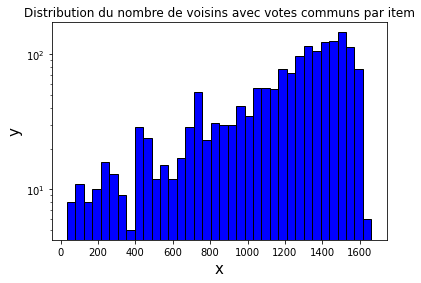

In [41]:
# !!!!!!!!!!!! le diagramme n'est pas bon 
plt.hist(neigh_with_com_votes, color = 'blue', edgecolor = 'black', bins = int(180/5), log=True)
         
# Add labels
plt.title('Distribution du nombre de voisins avec votes communs par item')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)

##### Proportion de votes manquants

In [42]:
user_item.isna().sum(axis = 0)

1       491
2       812
3       853
4       734
5       857
       ... 
1678    942
1679    942
1680    942
1681    942
1682    942
Length: 1682, dtype: int64

Text(0, 0.5, '#items')

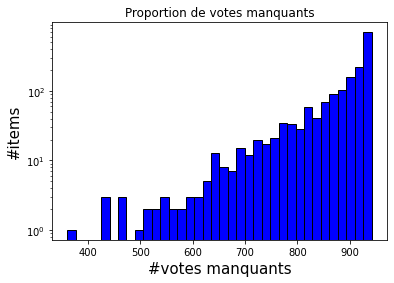

In [43]:
plt.hist(user_item.isna().sum(axis = 0), color = 'blue', edgecolor = 'black', bins = int(180/5), log=True)

# Add labels
plt.title('Proportion de votes manquants')
plt.xlabel('#votes manquants',fontsize=15)
plt.ylabel('#items',fontsize=15)

#### 2.c effectuer le calcul pour le premier item 

In [ ]:
#item_item = item_item.iloc[1:,1:]

In [19]:
#Create a df with centered votes of user_item
user_item_centred = user_item.add(-user_item.T.mean().T, axis=0)
print(user_item_centred.shape)

(943, 1682)


In [32]:
def build_users_items_neigh_mtx(df_10_index_i,user_item):
    """
    builds an item votes matrix of users with 10 neighbors of this item (V in the video)
    """
    df_10_votes = pd.DataFrame(np.zeros((N_USERS, 10)), index = range(1,N_USERS+1))
    for i in range(N_USERS):
        #loop over 10 neighbors indexes of the actual item "i" 
        for index, value in df_10_index_i.items():
            #fill df with the votes associated to these 10 neighbors 
            df_10_votes.loc[i+1,index] = user_item.loc[i+1,int(value)]
            
    return df_10_votes

In [33]:
#To return a (943,10) df with votes from user_item matrix from the original user_item df (not centered)
#df_10_votes = build_users_items_neigh_mtx(df_10_index.iloc[0],user_item)

#To return a (943,10) df with votes from centered_user_item matrix
df_10_votes = build_users_items_neigh_mtx(df_10_index.iloc[0],user_item_centred)

In [248]:
def estimate_votes(item, df_10_neighbors_sim, df_10_votes):
    """
    returns votes given an item
    """
    #get item's 10 neighbors weights wich s W, note that it is the same for all users for a selected item
    item_wights = pd.DataFrame(df_10_neighbors_sim.loc[item])
    K = pd.DataFrame(np.zeros((N_USERS, 1)), index = range(1,N_USERS+1))
    W = pd.DataFrame(np.zeros((N_USERS, 10)), index = range(1,N_USERS+1))
    
    #loop over users
    for u in range(1,len(df_10_votes)+1):
        #c is a user mask vector to not consider neighbors weights associated to nan votes
        #to be done for each item
        c_df = pd.DataFrame(df_10_votes.loc[u])
        c_df[~df_10_votes.loc[u].isnull()==True] = 1
        c_df[~df_10_votes.loc[u].isnull()==False] = 0
        
        #We put to zero weights with no associated votes, to avoid bias coming from K 
        masked_weights = np.dot(c_df.T,item_wights).item()
        #Note that K has some zero values as not all neighbors have votes
        K.loc[u,0] = 1/(masked_weights) if masked_weights != 0 else 0
        
        # if W_u was different for each user
        #W.loc[u] = (c_df*item_wights).T.iloc[0]
        #W.loc[u] = item_wights.to_numpy().flatten()*c_df.to_numpy().flatten()

    return K*(np.dot(df_10_votes.fillna(0),item_wights))

In [249]:
#return votes vector for item 1, note that votes are centered here
estimated_vote = estimate_votes(1,df_10_neighbors_sim,df_10_votes)
print(estimated_vote.shape)
print(estimated_vote)

(943, 1)
            0
1    0.480737
2    0.000000
3    0.000000
4    0.000000
5   -0.882230
..        ...
939  0.000000
940  0.295848
941 -0.045455
942 -0.265823
943 -0.151555

[943 rows x 1 columns]


In [51]:
# On rajoute le fait qu une note predite , 1 est de 1 et que > 5 est 
v_j_df = pd.DataFrame(v_j__)
v_j_df[v_j_df< 1 ] = 1
v_j_df[v_j_df > 5 ] = 5

### 2.d. Rapportez l'erreur quadratique moyenne et un histogramme de sa distribution

In [ ]:
user_item_centred.head

In [258]:
def estimate_all_votes(df_10_neighbors_sim, df_10_votes):
    '''
    returns votes for all items
    '''
    es_votes = pd.DataFrame(np.zeros((N_USERS, N_ITEMS)), index = range(1,N_USERS+1), columns = range(1,N_ITEMS+1))
    for item in range(1,N_ITEMS+1):
        es_votes[item] = estimate_votes(item, df_10_neighbors_sim, df_10_votes)

    return es_votes

In [260]:
start_time = time.time()
all_estimated_votes = estimate_all_votes(df_10_neighbors_sim, df_10_votes)
print(time.time()-start_time)

2664.637523174286


In [261]:
#calculate Root Mean Squared Error (RMSE)
RMSE_df = np.sqrt((all_estimated_votes - user_item_centred)**2)

In [264]:
RMSE_df.head

<bound method NDFrame.head of          1         2         3         4         5         6         7     \
1    0.908969  1.096523  0.088104  1.102449  1.078451  0.919128  0.092199   
2    0.290323       NaN       NaN       NaN       NaN       NaN       NaN   
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5    2.007945  1.007492       NaN       NaN       NaN       NaN       NaN   
..        ...       ...       ...       ...       ...       ...       ...   
939       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
940       NaN       NaN       NaN  1.750926       NaN       NaN  0.244516   
941  1.000000       NaN       NaN       NaN       NaN       NaN  0.000000   
942       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
943       NaN  1.740503       NaN       NaN       NaN       NaN       NaN   

         8         9         10    ...  1673 

Text(0, 0.5, 'y')

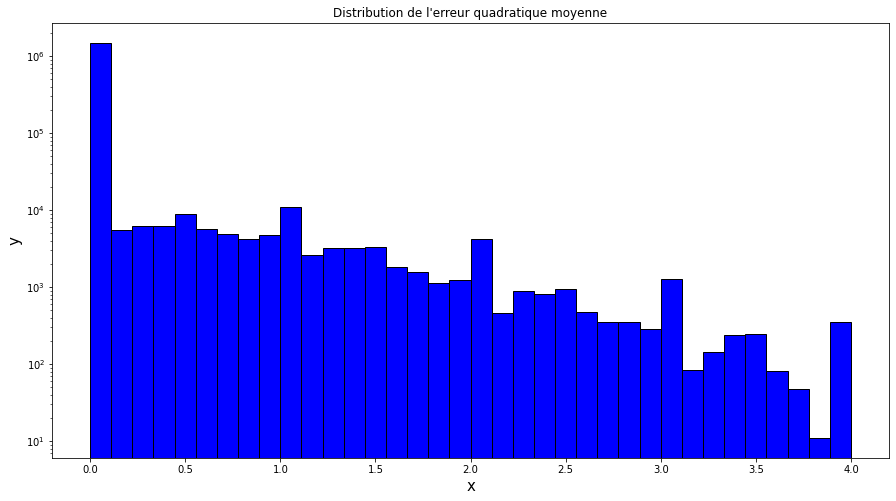

In [268]:
''' Distribution de l'erreur quadratique moyenne '''
plt.figure(figsize=(15,8))
plt.hist(RMSE_df.fillna(0).values.flatten(), color = 'blue', edgecolor = 'black', bins = int(180/5), log=True)
# Add labels
plt.title('Distribution de l\'erreur quadratique moyenne')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)

## Question 3

## Question 4 

## Question 5 